# MLiS Project -- Breast Cancer

## Part I: Data Preparation

### Loading data and set options

In [ ]:
data ='/Users/sallyfan/Study/Nottingham/MLiS/breast-cancer-wisconsin.data'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import zipfile
import scipy


# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 4000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install xlrd
!pip install openpyxl

In [ ]:
with open("breast-cancer-wisconsin.names") as f:
    print(f.read())

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

In [ ]:
col_name = ['Samplecodenumber','ClumpThickness','UniformityofCellSize','UniformityofCellShape',
            'MarginalAdhesion','SingleEpithelialCellSize','BareNuclei',
            'BlandChromatin','NormalNucleoli','Mitoses','Class']
cancerdata = pd.read_csv('/Users/sallyfan/Study/Nottingham/MLiS/breast-cancer-wisconsin.data', 
                         low_memory=False,names=col_name)
cancerdata.head()

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### General data preparation

In [ ]:
#Drop the column that represent ID
cancerdata = cancerdata.drop(['Samplecodenumber'], 1)

In [ ]:
# Check the loan status and distinct the target value.
cancerdata['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [ ]:
#Select the finished loan including repaid and late, delete the 'current' loan
Benign = cancerdata[(cancerdata.Class == 2) ].sample(240).index
Malignant = cancerdata[(cancerdata.Class == 4) ].sample(240).index
cancer = cancerdata.loc[Benign|Malignant]
cancer = cancer.reset_index(drop=True)
cancer['classes'] = cancer.Class.map({2:0,4:1})
cancer = cancer.drop(['Class'], 1)
cancer.head(10)

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,classes
0,6,8,8,1,3,4,3,7,1,0
1,4,1,1,3,2,1,3,1,1,0
2,8,10,10,8,7,10,9,7,1,1
3,2,1,1,1,2,1,1,1,5,0
4,4,2,1,1,2,1,2,1,1,0
5,2,1,1,1,2,1,2,1,1,0
6,5,3,3,3,2,3,4,4,1,1
7,1,1,1,1,2,3,3,1,1,0
8,8,7,5,10,7,9,5,5,4,1
9,7,4,6,4,6,1,4,3,1,1


In [ ]:
cancer['classes'].value_counts()

0    240
1    240
Name: classes, dtype: int64

### Preprocessing by attributes

##### Plot of variables:

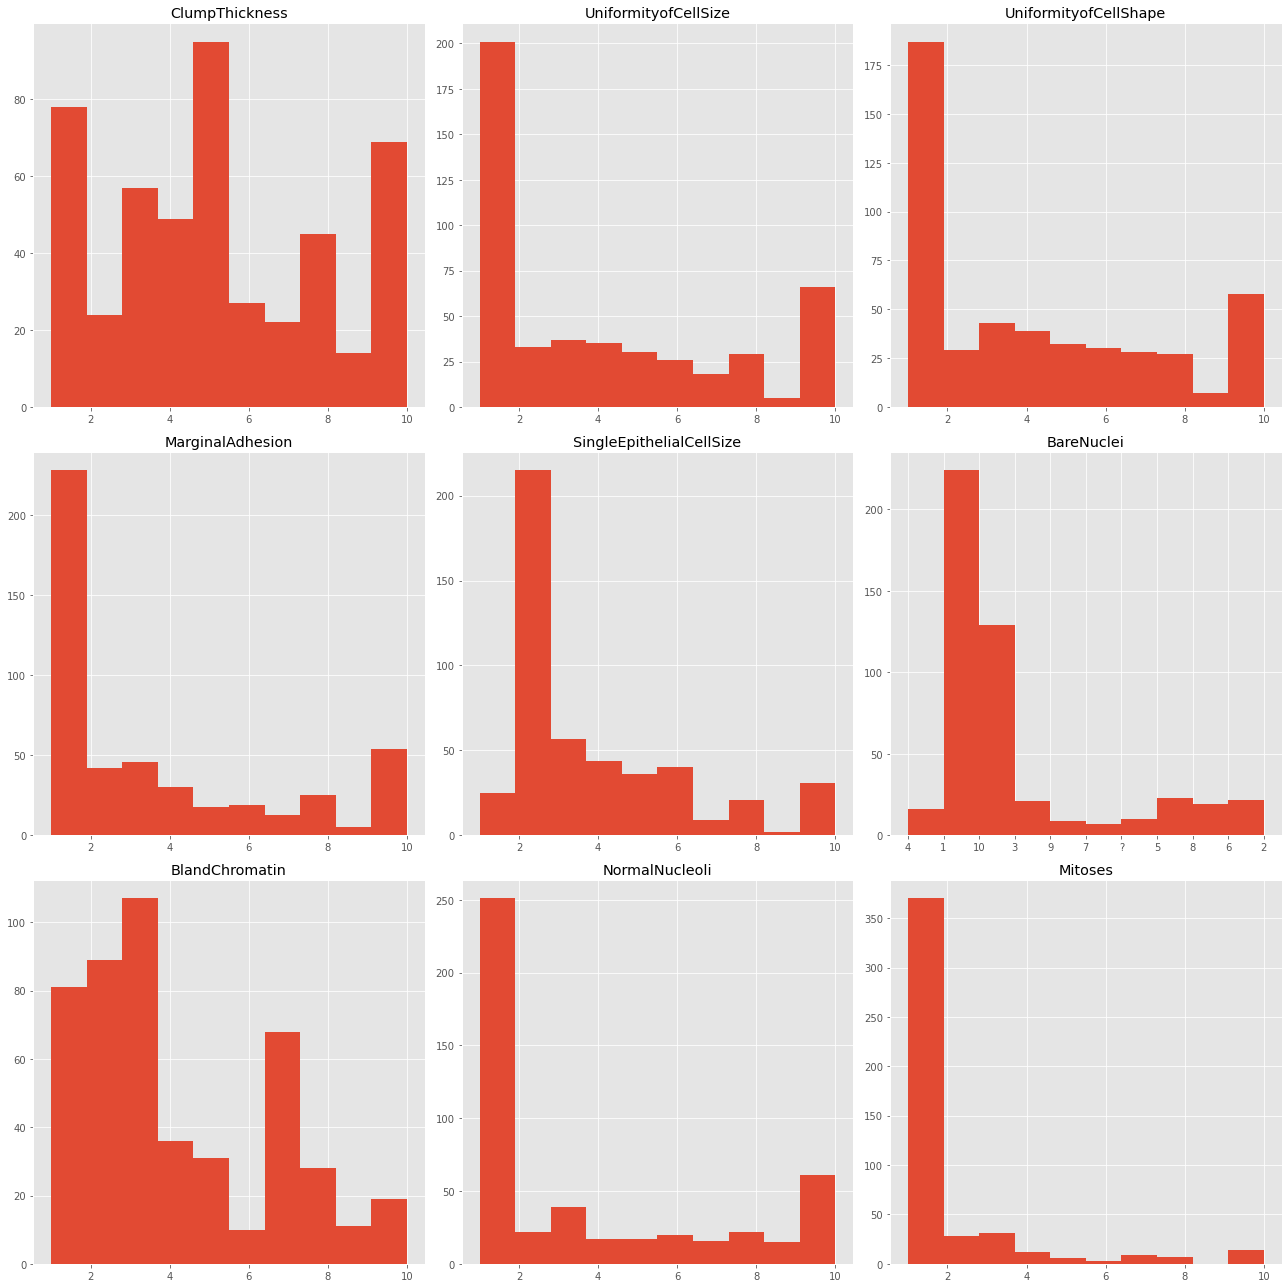

In [ ]:
# plot date variables and find the variables with similar distributions, keep only one of them.
#['ClumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion',
#'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']
fig, axs = plt.subplots(3, 3, figsize=(18,18))
axs[0,0].hist(cancer['ClumpThickness'])
axs[0,0].set_title("ClumpThickness")
axs[0,1].hist(cancer['UniformityofCellSize'])
axs[0,1].set_title("UniformityofCellSize")
axs[0,2].hist(cancer['UniformityofCellShape'])
axs[0,2].set_title("UniformityofCellShape")
axs[1,0].hist(cancer['MarginalAdhesion'])
axs[1,0].set_title("MarginalAdhesion")
axs[1,1].hist(cancer['SingleEpithelialCellSize'])
axs[1,1].set_title("SingleEpithelialCellSize")
axs[1,2].hist(cancer['BareNuclei'])
axs[1,2].set_title("BareNuclei")
axs[2,0].hist(cancer['BlandChromatin'])
axs[2,0].set_title("BlandChromatin")
axs[2,1].hist(cancer['NormalNucleoli'])
axs[2,1].set_title("NormalNucleoli")
axs[2,2].hist(cancer['Mitoses'])
axs[2,2].set_title("Mitoses")
fig.tight_layout()



In [ ]:
#drop variables with similar distribution (same distribution means high correlations)
#loan=loan.drop(["UniformityofCellShape", "MarginalAdhesion"], 1)

In [ ]:
cancer.dtypes.value_counts()

int64     9
object    1
dtype: int64

In [ ]:
cancer.select_dtypes('object')

,BareNuclei
0,4
1,1
2,10
3,1
4,1
5,1
6,3
7,3
8,9
9,1


In [ ]:
cancer = cancer.replace('?' ,np.nan)
##Finding the the count and percentage of values that are missing in the dataframe.
null1 = pd.DataFrame({'Count': cancer.isnull().sum(), 'Percent': 100*cancer.isnull().sum()/len(cancer)})

##printing columns with null count more than 0
null1[null1['Count'] > 0]


,Count,Percent
BareNuclei,10,2.083333


In [ ]:
cancer["BareNuclei"]=cancer["BareNuclei"].astype(float)
cancer=cancer.fillna(cancer.mean())

The weight of evidence is used when a category variable contains too much classes, which make the coeffecient be poorly estimated. It is defined as $w(x)=log(\frac{P(X=x|Y=0)}{P(X=x|Y=1)})$, where $w(x)$ is the weight of evidence for varaible x.

In [ ]:
# for category variables with too many classes, use weight of evidence(woe) to convert them into continuous value 
# Define the weight of evidence 
#def woe_list(df,feature_list,target):
#    n0=sum(1-df[target])
#    n1=sum(df[target])
#    for i in range(len(feature_list)):
#        lst =pd.crosstab(df[feature_list[i]],df[target])
#        lst1=lst.replace(0, 0.5)
#        lst1["woe_"+ feature_list[i]]=np.log((lst1[0]/n0)/(lst1[1]/n1)) 
#        df=pd.merge(df, lst1["woe_"+ feature_list[i]], on=feature_list[i], how="left")
#        df=df.drop(feature_list[i], 1)
#    return df

#f_list=[""]
#loan=woe_list(df,f_list,"target")

In [ ]:
# Correlation between feature and target variables
# Delete the variables having low or no correlation with target variables
corr_list1=cancer.corr()['classes'].abs().sort_values(ascending=False)
corr_list_new=corr_list1[corr_list1>0.01].index.values.tolist()
corr_list1
cancer=cancer[corr_list_new]
cancer.head(3)

,classes,BareNuclei,UniformityofCellSize,UniformityofCellShape,BlandChromatin,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,4.0,8,8,3,6,7,1,3,1
1,0,1.0,1,1,3,4,1,3,2,1
2,1,10.0,10,10,9,8,7,8,7,1


In [ ]:
#find the variables with high correlations
cor1 = cancer.corr().abs()
list1 = cor1.stack().sort_values(ascending=False).drop_duplicates()  
high_corr= list1[list1>0.70].index.values.tolist()
high_corr.remove(high_corr[0])

display(list1)


classes                   classes                     1.000000
UniformityofCellShape     UniformityofCellSize        0.894362
BareNuclei                classes                     0.812545
classes                   UniformityofCellSize        0.795361
                          UniformityofCellShape       0.792848
                          BlandChromatin              0.744159
BlandChromatin            UniformityofCellSize        0.738742
UniformityofCellSize      SingleEpithelialCellSize    0.722817
BlandChromatin            UniformityofCellShape       0.718158
classes                   ClumpThickness              0.704086
UniformityofCellSize      NormalNucleoli              0.692590
UniformityofCellShape     NormalNucleoli              0.690310
SingleEpithelialCellSize  UniformityofCellShape       0.682910
classes                   NormalNucleoli              0.682873
UniformityofCellSize      MarginalAdhesion            0.675463
BareNuclei                UniformityofCellShape       0

In [ ]:
# for variable pairs with high correlation, keep only one of them
columnlist=list(cancer.columns)
len(high_corr)
for i in range(len(high_corr)):
    if "classes" in high_corr[i]:
        columnlist=columnlist
    else:
        if high_corr[i][0] in columnlist and high_corr[i][1] in columnlist:
            columnlist.remove(high_corr[i][1])
        else:
            columnlist=columnlist
cancer_final=cancer[columnlist]
#['ClumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion',
#'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']


In [ ]:
cancer_final.head()

,classes,BareNuclei,BlandChromatin,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,4.0,3,6,7,1,3,1
1,0,1.0,3,4,1,3,2,1
2,1,10.0,9,8,7,8,7,1
3,0,1.0,1,2,1,1,2,5
4,0,1.0,2,4,1,1,2,1


## Part II: Construction of the model

### Split the dataset

In [ ]:
#Split the data into training set and test set
import random
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(cancer_final,random_state=None, shuffle=True)
train_x=training_data.drop(['classes'], 1) 
train_y=training_data[['classes']]
test_x=test_data.drop(['classes'], 1)
test_y=test_data[['classes']]

In [ ]:
#Re-do data preparation: delete the outliers and perform normalisation
from sklearn.preprocessing import StandardScaler
# Remove outliers
cancer_norm = cancer_final[(np.abs(scipy.stats.zscore(cancer_final)) < 3).all(axis=1)]
# Zero mean normalisation
cancer_norm.iloc[:,1:]=(cancer_norm.iloc[:,1:]-cancer_norm.iloc[:,1:].mean())/cancer_norm.iloc[:,1:].std()

In [ ]:
cancer_norm.head()

,classes,BareNuclei,BlandChromatin,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,-0.092843,-0.354097,0.345235,1.090503,-0.746748,-0.236079,-0.400348
1,0,-0.864670,-0.354097,-0.339270,-0.730750,-0.093877,-0.669521,-0.400348
2,1,1.450813,1.978878,1.029739,1.090503,1.538301,1.497687,-0.400348
3,0,-0.864670,-1.131756,-1.023774,-0.730750,-0.746748,-0.669521,2.955991
4,0,-0.864670,-0.742926,-0.339270,-0.730750,-0.746748,-0.669521,-0.400348


In [ ]:
#split the new dataset
training_data_norm, test_data_norm = train_test_split(cancer_norm,random_state=None, shuffle=True)
train_x_norm=training_data_norm.drop(['classes'], 1) 
train_y_norm=training_data_norm[['classes']]
test_x_norm=test_data_norm.drop(['classes'], 1)
test_y_norm=test_data_norm[['classes']]

### Logistic Regression (LR) Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classifier_lr_norm = LogisticRegression()
classifier_lr_norm.fit(train_x_norm, train_y_norm)

prediction_lr_norm = classifier_lr_norm.predict(test_x_norm)

print("The accuracy for LR is {:.2f}%".format(accuracy_score(test_y_norm,prediction_lr_norm)*100))

print(classification_report(test_y_norm, prediction_lr_norm, 
                            target_names = ['Malignant(Class 2)','Benign (Class 4)']))

The accuracy for LR is 94.78%
                    precision    recall  f1-score   support

Malignant(Class 2)       0.90      1.00      0.95        56
  Benign (Class 4)       1.00      0.90      0.95        59

          accuracy                           0.95       115
         macro avg       0.95      0.95      0.95       115
      weighted avg       0.95      0.95      0.95       115



### K-Nearest Neighbour (KNN) Algorithm

In [ ]:
#KNN with 5 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 5)  
knn5.fit(train_x_norm, train_y_norm)
prediction_knn_norm = knn5.predict(test_x_norm)

print("The accuracy for KNN is {:.2f}%".format(accuracy_score(test_y_norm,prediction_knn_norm)*100))

print(classification_report(test_y_norm, prediction_knn_norm, 
                            target_names = ['Malignant(Class 2)','Benign (Class 4)']))

The accuracy for KNN is 96.52%
                    precision    recall  f1-score   support

Malignant(Class 2)       0.93      1.00      0.97        56
  Benign (Class 4)       1.00      0.93      0.96        59

          accuracy                           0.97       115
         macro avg       0.97      0.97      0.97       115
      weighted avg       0.97      0.97      0.97       115



Maximum KNN Score is 96.52%
KNN Score reaches maximum when number of neighbors is 5


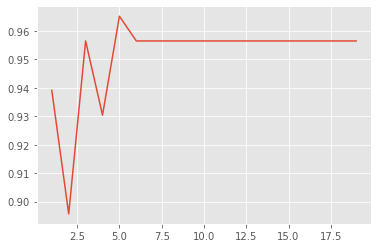

In [ ]:
#select the best hyperparameter of knn
score_list_knn=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(train_x_norm, train_y_norm)
    prediction_knn=knn.predict(test_x_norm)   
    score_list_knn.append(accuracy_score(test_y_norm,prediction_knn))

x=range(1,20)
print("Maximum KNN Score is {:.2f}%".format(max(score_list_knn)*100))
print("KNN Score reaches maximum when number of neighbors is {:}".format(x[np.argmax(score_list_knn)]))

plt.plot(x, score_list_knn)
plt.show()


### Support Vector Machine(SVM)

---



In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state = 1)
svm.fit(train_x_norm,train_y_norm)
prediction_svm = svm.predict(test_x_norm)
print("The accuracy for SVM is {:.2f}%".format(accuracy_score(test_y_norm,prediction_knn)*100))

print(classification_report(test_y_norm, prediction_svm, 
                            target_names = ['Malignant(Class 4)','Benign (Class 2)']))

The accuracy for SVM is 95.65%
                    precision    recall  f1-score   support

Malignant(Class 4)       0.92      1.00      0.96        56
  Benign (Class 2)       1.00      0.92      0.96        59

          accuracy                           0.96       115
         macro avg       0.96      0.96      0.96       115
      weighted avg       0.96      0.96      0.96       115



### Random Forest(RF)

In [ ]:
# Construct model with Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(train_x, train_y) 
prediction_rf = rf.predict(test_x)

print("The accuracy for Random Forest is {:.2f}%".format(accuracy_score(test_y,prediction_rf)*100))

print(classification_report(test_y, prediction_rf, 
                            target_names = ['Malignant(Class 4)','Benign (Class 2)']))


The accuracy for Random Forest is 95.83%
                    precision    recall  f1-score   support

Malignant(Class 4)       0.96      0.97      0.96        66
  Benign (Class 2)       0.96      0.94      0.95        54

          accuracy                           0.96       120
         macro avg       0.96      0.96      0.96       120
      weighted avg       0.96      0.96      0.96       120



## Part III: Analyze and Evaluation ---Not yet finished

### Confusion Matrix and Cross-Validation for KNN 

In [ ]:
#Cross-validation for KNN with optimal hyperparameter
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
x_knn_opt_cv=np.array(loan_knn.iloc[:,1:])
y_knn_opt_cv=np.array(loan_knn.iloc[:,0])
# 10-fold cross validation for knn
knn_opt_cv_scorelist = []
knn_opt_cv = KNeighborsClassifier(n_neighbors = x[np.argmax(score_list_knn)])
for train_index, test_index in kf.split(x_knn_opt_cv):
    train_x_knn_cv,test_x_knn_cv = x_knn_opt_cv[train_index],x_knn_opt_cv[test_index]
    train_y_knn_cv,test_y_knn_cv = y_knn_opt_cv[train_index],y_knn_opt_cv[test_index]
    knn_opt_cv.fit(train_x_knn_cv, train_y_knn_cv) 
    knn_opt_cv_scorelist.append(knn_opt_cv.score(test_x_knn_cv,test_y_knn_cv))

print("The cross validation score list of KNN for each fold:", knn_opt_cv_scorelist)
print("The average score of KNN is:", np.mean(knn_opt_cv_scorelist))

The cross validation score list of KNN for each fold: [0.758086383885338, 0.720801859384079, 0.8289754018981212, 0.8822390083284912, 0.9020918070889018, 0.9084745762711864, 0.9046973365617433, 0.9027602905569008, 0.9018886198547216, 0.9196125907990315]
The average score of KNN is: 0.8629627874628515


### Confusion Matrix and Cross-Validation for Random Forest 

In [ ]:
#Cross-validation for Random Forest
x_rf_cv=np.array(loan_final.iloc[:,1:])
y_rf_cv=np.array(loan_final.iloc[:,0])
# 10-fold cross validation for random forest
rf_cv_scorelist = []
rf_cv = RandomForestClassifier(n_estimators = 100, oob_score=True, max_depth=10, 
                               min_samples_leaf = 20, min_samples_split=10)
for train_index, test_index in kf.split(x_rf_cv):
    train_x_rf_cv,test_x_rf_cv = x_rf_cv[train_index],x_rf_cv[test_index]
    train_y_rf_cv,test_y_rf_cv = y_rf_cv[train_index],y_rf_cv[test_index]
    rf_cv.fit(train_x_rf_cv, train_y_rf_cv) 
    rf_cv_scorelist.append(rf_cv.score(test_x_rf_cv,test_y_rf_cv))

print("The cross validation score list of Random Forest for each fold::", rf_cv_scorelist)
print("The average score of Random Forest is:", np.mean(rf_cv_scorelist))

The cross validation score list of Random Forest for each fold:: [0.8811570371477689, 0.857762164586292, 0.859780252634726, 0.8875850213020405, 0.9191269900590477, 0.9331788623962927, 0.9275730622617535, 0.9362433664698407, 0.9449136706779281, 0.9676334280161459]
The average score of Random Forest is: 0.9114953855551837
